In [1]:
import networkx as nx
import scipy as sc
import matplotlib.pyplot as plt
from itertools import combinations
import operator
from gurobipy import *
import random as rd

In [2]:
commodities = ['first','second']

In [3]:
G = nx.barabasi_albert_graph(1000,2)
pos=nx.spring_layout(G)
for (i,j,d) in G.edges(data=True):
    d['weight']=rd.randint(800,2000)
pos=nx.spring_layout(G)
# G=nx.Graph()
# filename="./roadNet-TX.txt"
# f=open(filename)
# for row in f:
#     myrow=row.split()
#     G.add_edge(myrow[0], myrow[1])
# weight=float(myrow[2]

In [4]:
for (i,j,d) in G.edges(data=True):
     d['weight']=rd.randint(2000,5200)

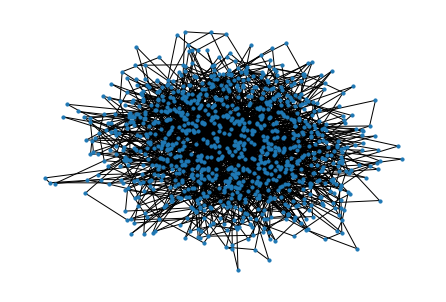

In [5]:
nx.draw(G,pos,node_size=10)

In [6]:
for i,j,d in G.edges(data=True):
    print(d)

{'weight': 4581}
{'weight': 2579}
{'weight': 2338}
{'weight': 4629}
{'weight': 3117}
{'weight': 3475}
{'weight': 4658}
{'weight': 4039}
{'weight': 3402}
{'weight': 2324}
{'weight': 4235}
{'weight': 4576}
{'weight': 2011}
{'weight': 2783}
{'weight': 5023}
{'weight': 2348}
{'weight': 4051}
{'weight': 4969}
{'weight': 3410}
{'weight': 4121}
{'weight': 2623}
{'weight': 3713}
{'weight': 3974}
{'weight': 2398}
{'weight': 2298}
{'weight': 3898}
{'weight': 2384}
{'weight': 4008}
{'weight': 3124}
{'weight': 4883}
{'weight': 4347}
{'weight': 2918}
{'weight': 2714}
{'weight': 2120}
{'weight': 2618}
{'weight': 2262}
{'weight': 2900}
{'weight': 2850}
{'weight': 2406}
{'weight': 2901}
{'weight': 3641}
{'weight': 3466}
{'weight': 2991}
{'weight': 2754}
{'weight': 2423}
{'weight': 4409}
{'weight': 3026}
{'weight': 3518}
{'weight': 2840}
{'weight': 4808}
{'weight': 3613}
{'weight': 3862}
{'weight': 4357}
{'weight': 4776}
{'weight': 4510}
{'weight': 3251}
{'weight': 2108}
{'weight': 3204}
{'weight': 258

In [7]:
for k in commodities:
    for (i,d) in G.nodes(data=True):
        d[k]=0


In [8]:
for (i,j,d) in G.edges(data=True):
    d['capacity']=1

In [9]:
G.nodes(data=True)

NodeDataView({0: {'first': 0, 'second': 0}, 1: {'first': 0, 'second': 0}, 2: {'first': 0, 'second': 0}, 3: {'first': 0, 'second': 0}, 4: {'first': 0, 'second': 0}, 5: {'first': 0, 'second': 0}, 6: {'first': 0, 'second': 0}, 7: {'first': 0, 'second': 0}, 8: {'first': 0, 'second': 0}, 9: {'first': 0, 'second': 0}, 10: {'first': 0, 'second': 0}, 11: {'first': 0, 'second': 0}, 12: {'first': 0, 'second': 0}, 13: {'first': 0, 'second': 0}, 14: {'first': 0, 'second': 0}, 15: {'first': 0, 'second': 0}, 16: {'first': 0, 'second': 0}, 17: {'first': 0, 'second': 0}, 18: {'first': 0, 'second': 0}, 19: {'first': 0, 'second': 0}, 20: {'first': 0, 'second': 0}, 21: {'first': 0, 'second': 0}, 22: {'first': 0, 'second': 0}, 23: {'first': 0, 'second': 0}, 24: {'first': 0, 'second': 0}, 25: {'first': 0, 'second': 0}, 26: {'first': 0, 'second': 0}, 27: {'first': 0, 'second': 0}, 28: {'first': 0, 'second': 0}, 29: {'first': 0, 'second': 0}, 30: {'first': 0, 'second': 0}, 31: {'first': 0, 'second': 0}, 32: 

In [10]:
G.edges(data=True)

EdgeDataView([(0, 1, {'weight': 4581, 'capacity': 1}), (0, 2, {'weight': 2579, 'capacity': 1}), (0, 3, {'weight': 2338, 'capacity': 1}), (0, 4, {'weight': 4629, 'capacity': 1}), (0, 7, {'weight': 3117, 'capacity': 1}), (0, 8, {'weight': 3475, 'capacity': 1}), (0, 9, {'weight': 4658, 'capacity': 1}), (0, 10, {'weight': 4039, 'capacity': 1}), (0, 11, {'weight': 3402, 'capacity': 1}), (0, 12, {'weight': 2324, 'capacity': 1}), (0, 13, {'weight': 4235, 'capacity': 1}), (0, 14, {'weight': 4576, 'capacity': 1}), (0, 16, {'weight': 2011, 'capacity': 1}), (0, 18, {'weight': 2783, 'capacity': 1}), (0, 19, {'weight': 5023, 'capacity': 1}), (0, 20, {'weight': 2348, 'capacity': 1}), (0, 22, {'weight': 4051, 'capacity': 1}), (0, 23, {'weight': 4969, 'capacity': 1}), (0, 25, {'weight': 3410, 'capacity': 1}), (0, 28, {'weight': 4121, 'capacity': 1}), (0, 34, {'weight': 2623, 'capacity': 1}), (0, 36, {'weight': 3713, 'capacity': 1}), (0, 46, {'weight': 3974, 'capacity': 1}), (0, 48, {'weight': 2398, 'c

In [11]:
supplier=rd.sample(G.nodes(),2)
terminals=rd.sample(G.nodes(),2)


/var/folders/np/xyxhbcvd7ks47j34qd3svpf00000gn/T/ipykernel_63100/3532041610.py:1: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  supplier=rd.sample(G.nodes(),2)
/var/folders/np/xyxhbcvd7ks47j34qd3svpf00000gn/T/ipykernel_63100/3532041610.py:2: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  terminals=rd.sample(G.nodes(),2)


In [12]:
for i,d in G.nodes(data=True):
    if i==terminals[0]:
        d['first']=2
        print(i,d['first'])
    if i==terminals[1]:
        d['second']=2
        print(i,d['second'])    

460 2
858 2


In [13]:
for i,d in G.nodes(data=True):
    if i==supplier[0]:
        d['first']=-2
        print(i,d['first'])
    if i==supplier[1]:
        d['second']=-2
        print(i,d['second'])

965 -2
967 -2


In [14]:
for k in commodities:
    for i,d in G.nodes(data=True):
        print(d)

{'first': 0, 'second': 0}
{'first': 0, 'second': 0}
{'first': 0, 'second': 0}
{'first': 0, 'second': 0}
{'first': 0, 'second': 0}
{'first': 0, 'second': 0}
{'first': 0, 'second': 0}
{'first': 0, 'second': 0}
{'first': 0, 'second': 0}
{'first': 0, 'second': 0}
{'first': 0, 'second': 0}
{'first': 0, 'second': 0}
{'first': 0, 'second': 0}
{'first': 0, 'second': 0}
{'first': 0, 'second': 0}
{'first': 0, 'second': 0}
{'first': 0, 'second': 0}
{'first': 0, 'second': 0}
{'first': 0, 'second': 0}
{'first': 0, 'second': 0}
{'first': 0, 'second': 0}
{'first': 0, 'second': 0}
{'first': 0, 'second': 0}
{'first': 0, 'second': 0}
{'first': 0, 'second': 0}
{'first': 0, 'second': 0}
{'first': 0, 'second': 0}
{'first': 0, 'second': 0}
{'first': 0, 'second': 0}
{'first': 0, 'second': 0}
{'first': 0, 'second': 0}
{'first': 0, 'second': 0}
{'first': 0, 'second': 0}
{'first': 0, 'second': 0}
{'first': 0, 'second': 0}
{'first': 0, 'second': 0}
{'first': 0, 'second': 0}
{'first': 0, 'second': 0}
{'first': 0,

{'first': 0, 'second': 0}
{'first': 0, 'second': 0}
{'first': 0, 'second': 0}
{'first': 0, 'second': 0}
{'first': 0, 'second': 0}
{'first': 0, 'second': 0}
{'first': 0, 'second': 0}
{'first': 0, 'second': 0}
{'first': 0, 'second': 0}
{'first': 0, 'second': 0}
{'first': 0, 'second': 0}
{'first': 0, 'second': 0}
{'first': 0, 'second': 0}
{'first': 0, 'second': 0}
{'first': 0, 'second': 0}
{'first': 0, 'second': 0}
{'first': 0, 'second': 0}
{'first': 0, 'second': 0}
{'first': 0, 'second': 0}
{'first': 0, 'second': 0}
{'first': 0, 'second': 0}
{'first': 0, 'second': 0}
{'first': 0, 'second': 0}
{'first': 0, 'second': 0}
{'first': 0, 'second': 0}
{'first': 0, 'second': 0}
{'first': 0, 'second': 0}
{'first': 0, 'second': 0}
{'first': 0, 'second': 0}
{'first': 0, 'second': 0}
{'first': 0, 'second': 0}
{'first': 0, 'second': 0}
{'first': 0, 'second': 0}
{'first': 0, 'second': 0}
{'first': 0, 'second': 0}
{'first': 0, 'second': 0}
{'first': 0, 'second': 0}
{'first': 0, 'second': 0}
{'first': 0,

In [15]:
from gurobipy import *
m=Model('commodityflow')

Set parameter Username
Academic license - for non-commercial use only - expires 2023-08-20


In [16]:
x = {}
for k in commodities:
    for i,d in G.nodes(data=True):
        for j in G.nodes():
            if (i,j) in G.edges():
                x[(k,i,j)] = m.addVar(lb=0,ub=1,vtype=GRB.BINARY,name='x.{0}.{1}.{2}'.format(k, i, j))

In [17]:
for (i,j,d) in G.edges(data=True):
    sum9=0
    for k in commodities:
        sum9+=x[(k,i,j)]
    m.addConstr(sum9<=d['capacity'])

In [18]:
for k in commodities:
    for i,d in G.nodes(data=True):
        sum1=0
        sum2=0
        for j in G.nodes():
            if i!=j:
                if (i,j) in G.edges():
                    sum1+=x[(k,i,j)]
                if (j,i) in G.edges():
                    sum2+=x[(k,j,i)]
        m.addConstr((sum2-sum1)==d[k])

In [19]:
obj=0
for k in commodities:
    for i,j,d in G.edges(data=True):
        obj+=x[(k,i,j)]*d['weight']

In [20]:
m.update()
m.setObjective(obj,GRB.MINIMIZE)
m.optimize()

Gurobi Optimizer version 9.5.2 build v9.5.2rc0 (mac64[rosetta2])
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 3996 rows, 7984 columns and 19960 nonzeros
Model fingerprint: 0x27dc4320
Variable types: 0 continuous, 7984 integer (7984 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e+03, 5e+03]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 2e+00]
Presolve removed 14 rows and 24 columns
Presolve time: 0.02s
Presolved: 3982 rows, 7960 columns, 19896 nonzeros
Variable types: 0 continuous, 7960 integer (7960 binary)
Found heuristic solution: objective 39315.000000

Root relaxation: objective 2.278600e+04, 311 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

*    0     0               0    22786.000000 22786.0000  0.00%     -    0s

Explored 1 n

In [21]:
m.write('model.lp')

In [22]:
# Routes={}
# for k in commodities:
#     route=[]
#     for (i,j) in G.edges():
#         if(x[(k,i,j)]==1):
#             route.append((i,j))
#     Routes[k]=route

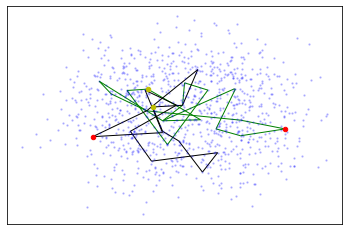

In [23]:
route1=[(i,j) for (i,j) in G.edges() if x[('first',i,j)].X>0 or x[('first',j,i)].X>0 ]
route2=[(i,j) for (i,j) in G.edges() if x[('second',i,j)].X>0 or x[('second',j,i)].X>0]
pos=nx.spring_layout(G)
nx.draw_networkx_nodes(G,pos,nodelist=G.nodes(),node_color='b', node_size=2,alpha=0.2)
nx.draw_networkx_nodes(G,pos,nodelist=supplier,node_color='y', node_size=20)
nx.draw_networkx_nodes(G,pos,nodelist=terminals,node_color='r', node_size=20)
nx.draw_networkx_edges(G,pos,edgelist=route1,edge_color='g', width=1)
nx.draw_networkx_edges(G,pos,edgelist=route2,edge_color='black',width=1)
plt.savefig("k=2.png", dpi=1000)
